### Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
true=pd.read_csv("True.csv")

In [3]:
true['label']="TRUE"

In [4]:
fake=pd.read_csv("Fake.csv")

In [5]:
fake['label']="FAKE"

In [6]:
news=pd.concat([true,fake])

In [7]:
news.shape

(44898, 5)

In [8]:
news.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [9]:
news.drop(['date'],axis=1,inplace=True)

In [10]:
news.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [11]:
news['text_len']=[len(x.split()) for x in news['text']]

In [12]:
top_len=news.sort_values(['text_len'],ascending=False)

In [13]:
top_len.head()

,title,text,subject,label,text_len
23086,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,Middle-east,FAKE,8135
22303,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,FAKE,8135
21978,The Las Vegas Mass Shooting – More to the Stor...,Shawn Helton 21st Century WireAlthough many ar...,US_News,FAKE,7928
22761,The Las Vegas Mass Shooting – More to the Stor...,Shawn Helton 21st Century WireAlthough many ar...,Middle-east,FAKE,7928
22506,"CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...",Shawn Helton 21st Century WireThe 1994 cult fi...,US_News,FAKE,7209


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
list_stops_words = stopwords.words("english")
news["text"] = news['text'].str.lower()
news["text"].replace('\n',' ', regex=True, inplace=True)

In [16]:
news.head()

,title,text,subject,label,text_len
0,"As U.S. budget fight looms, Republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,TRUE,749
1,U.S. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,TRUE,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington (reuters) - the special counsel inv...,politicsNews,TRUE,457
3,FBI Russia probe helped by Australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,TRUE,376
4,Trump wants Postal Service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,TRUE,852


In [17]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
sid = SentimentIntensityAnalyzer()
polarity=[]
for readme in news.text:
    overall=0
    sentences = nltk.tokenize.sent_tokenize(readme)
    for sentence in sentences:
        sentiment_score = sid.polarity_scores(sentence)
        if sentiment_score["compound"] == 0.0:
            overall+=0
        elif sentiment_score["compound"] > 0.0:
            overall+=1
        else:
            overall-=1
    if overall==0:
        polarity.append('Neutral')
    elif overall>0:
        polarity.append('Positive')
    else:
        polarity.append('Negative')

In [20]:
news['polarity']=polarity

### Visualisations

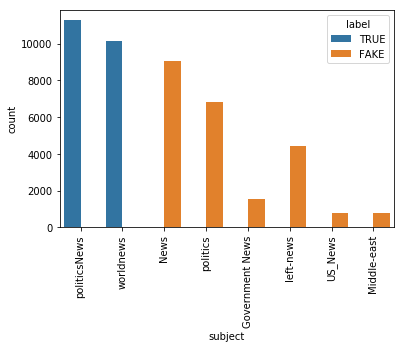

In [43]:
sns.countplot(news.subject,hue=news['label'])
plt.xticks(rotation =90)
plt.show()

##### Here we can see the news subjects distribution for fake and real news

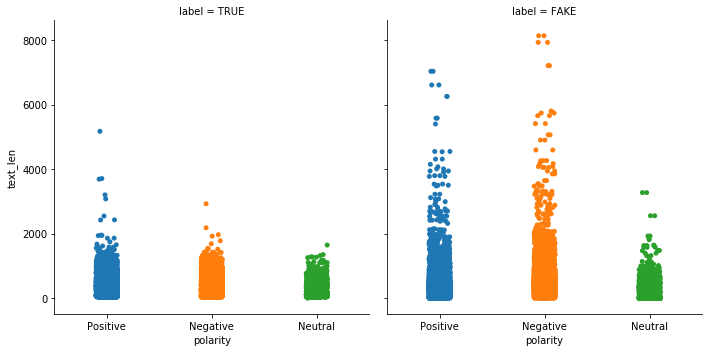

In [38]:
sns.catplot(x="polarity", y="text_len", col="label", data=news)
plt.show()

##### This plot is based on polarity which tell us the sentiment of news texts. This graph is plotted against news text length

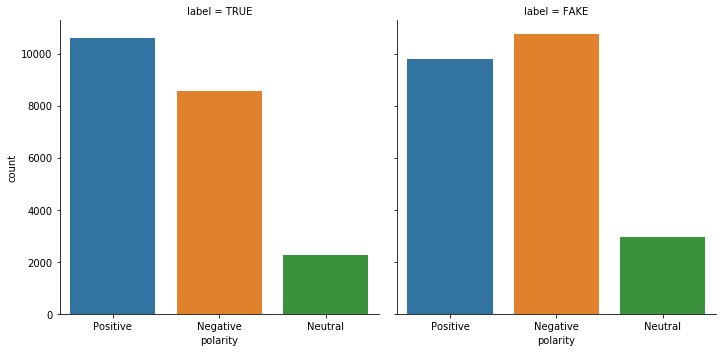

In [49]:
sns.catplot(x="polarity", col="label",data=news,kind="count")
plt.show()

##### Here we can see that news with positive polarity are mostly True and news with negative and neutral polarity are mostly Fake

In [67]:
from wordcloud import WordCloud 

In [68]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 300,
        height = 200,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (7, 7),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

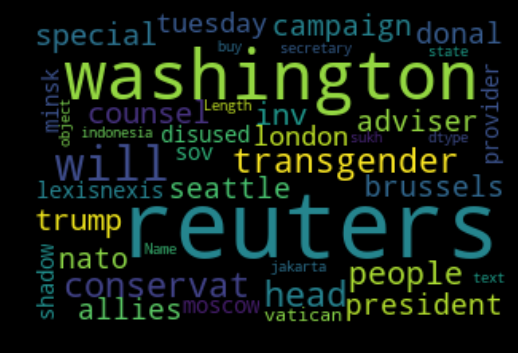

In [69]:
true_text = news[news['label']=='TRUE'].text
generate_word_cloud(true_text)

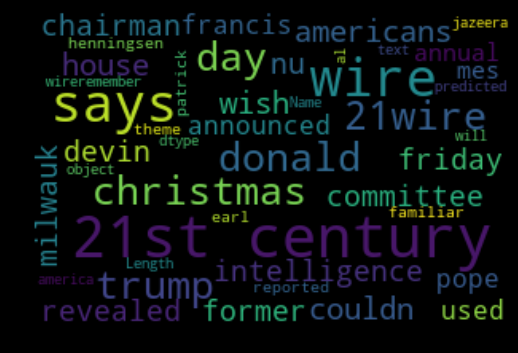

In [70]:
true_text = news[news['label']=='FAKE'].text
generate_word_cloud(true_text)

In [77]:
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [78]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [82]:
true_word = basic_clean(''.join(str(news[news['label']=='TRUE'].text.tolist())))

In [83]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

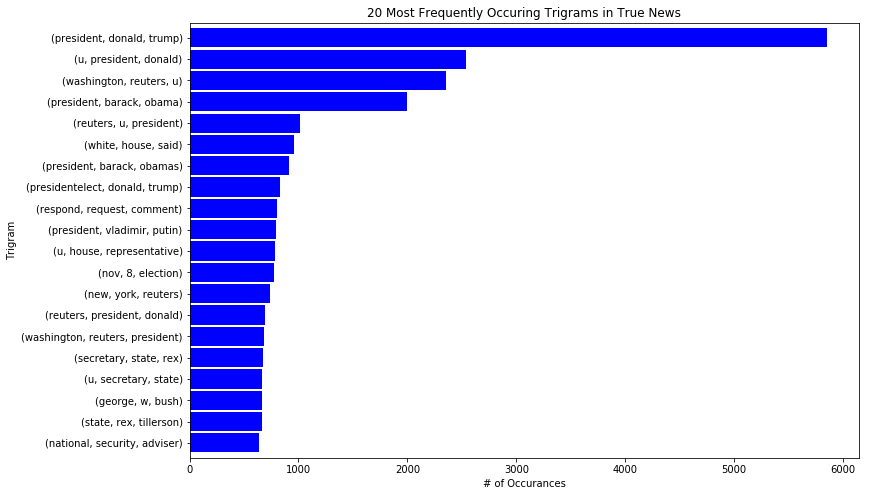

In [84]:
true_trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams in True News')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [86]:
fake_word = basic_clean(''.join(str(news[news['label']=='FAKE'].text.tolist())))

In [87]:
fake_trigrams_series = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

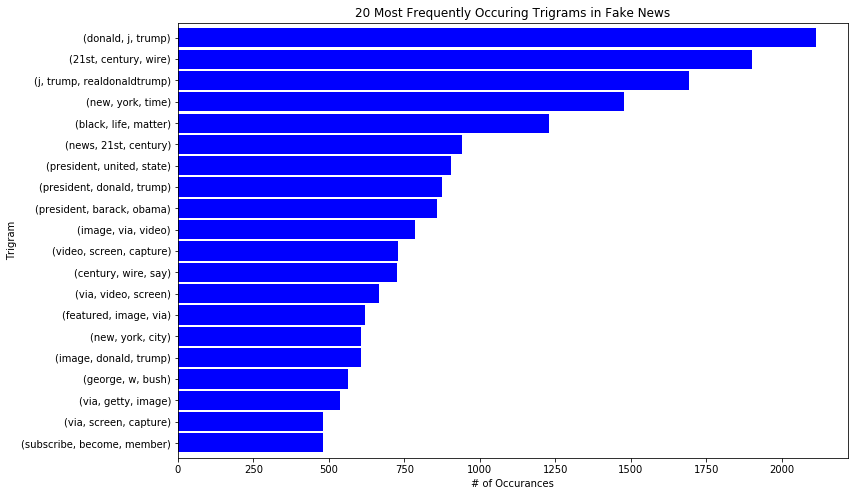

In [88]:
fake_trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams in Fake News')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

### Model

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news["text"], news["label"], 
                                                    test_size=0.30, 
                                                    random_state=42)

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

In [127]:
from sklearn import metrics

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:

classify = Pipeline(
                [('vect', CountVectorizer(stop_words= list_stops_words,ngram_range=(1,2))), 
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB())
                 ])

In [130]:
classify.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me',...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [131]:
classify.score(X_test, y_test)

0.9540517961570593